In [1]:
import os
import csv
import mysql.connector as mc 
import time
import webbrowser
import sys
from sklearn.cluster import KMeans
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
sns.set()

In [2]:
#connect to database and grab everything from 2010
cnx = mc.connect(user='root',password='******',host='localhost',database='mlb')
cursor = cnx.cursor()
query = "SELECT * FROM Pitch WHERE MID(gameID,4,4)=2010"
df2010 = pd.read_sql_query(query,cnx)
cnx.close()

In [40]:
#agKMeans = Akash Goyal K-means 
class agKMeans(KMeans):
    def __init__(self,df,attributeList,fraction):
        df_samp = df.sample(frac=fraction,random_state=1)
        df_samp = df_samp[attributeList]
        df_samp.dropna(how='any',axis=0)
        #https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan
        # this not null was from wes mckinney
        df_samp = df_samp[pd.notnull(df_samp[attributeList])]
        self.df = df_samp
        self.y_kmeans = None
        self.kmeans = None
        self.plot = None
        
    def createCluster(self,number_clusters):
        kmeans = KMeans(n_clusters=number_clusters)
        kmeans.fit(self.df)
        y_kmeans = kmeans.predict(self.df)
        self.kmeans = kmeans
        self.y_kmeans = y_kmeans 
        return kmeans, y_kmeans
    
    def generatePlot(self,xColumn,yColumn):
        plt.scatter(self.df[xColumn],self.df[yColumn],c=self.y_kmeans,s=50,cmap='viridis')
        centers = self.kmeans.cluster_centers_
        plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)
        
    def showScatterPlot(self,xColumn,yColumn):
        plt.scatter(self.df[xColumn],self.df[yColumn])

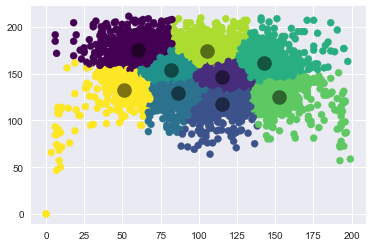

In [43]:
xy = agKMeans(df2010,['x','y'],1/100)
xy.createCluster(9)
xy.generatePlot('x','y')

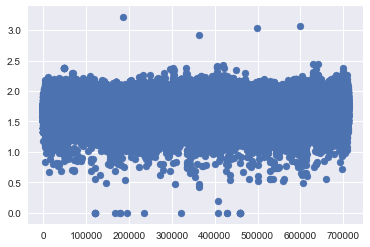

In [44]:
plt.scatter(range(1,len(df2010['szBottom'])+1),df2010['szBottom'])


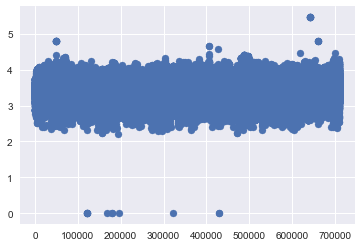

In [22]:
plt.scatter(range(1,len(df2010['szTop'])+1),df2010['szTop'])

In [45]:
sz = agKMeans(df2010,['szBottom','szTop'],1)
print (len(sz.df))
print (sz.df.isnull().sum())
sz.createCluster(2)
#sz.generatePlot('szBottom','szTop')

710378
szBottom    1225
szTop       1225
dtype: int64


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [48]:
print (sz.df[sz.df['szBottom'].isnull()])

        szBottom  szTop
298437       NaN    NaN
176401       NaN    NaN
375565       NaN    NaN
342698       NaN    NaN
137537       NaN    NaN
612168       NaN    NaN
603382       NaN    NaN
68403        NaN    NaN
150164       NaN    NaN
107457       NaN    NaN
133743       NaN    NaN
178996       NaN    NaN
641404       NaN    NaN
174322       NaN    NaN
450110       NaN    NaN
524186       NaN    NaN
335368       NaN    NaN
310565       NaN    NaN
238834       NaN    NaN
552057       NaN    NaN
142333       NaN    NaN
196481       NaN    NaN
334514       NaN    NaN
605260       NaN    NaN
123132       NaN    NaN
291916       NaN    NaN
692932       NaN    NaN
150070       NaN    NaN
642263       NaN    NaN
596333       NaN    NaN
...          ...    ...
288968       NaN    NaN
481392       NaN    NaN
173748       NaN    NaN
629467       NaN    NaN
176210       NaN    NaN
687149       NaN    NaN
25522        NaN    NaN
479455       NaN    NaN
615263       NaN    NaN
631388       NaN